In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("../data/ML/df_final1.csv")
df.head()

,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,...,Multiple Lines_No,Multiple Lines_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Music_No,Streaming Music_Yes,Streaming Movies_No,Streaming Movies_Yes,Contract_mapeada,Offer_mapeada
0,78,1,0,0,0,2,8,1,1,0,...,1,0,1,0,1,0,0,1,0,5
1,74,0,1,1,1,3,17,1,0,1,...,0,1,1,0,1,0,1,0,0,4
2,71,1,3,0,1,3,52,1,1,1,...,0,1,0,1,0,1,0,1,0,3
3,78,0,1,1,1,3,12,1,0,0,...,1,0,0,1,1,0,0,1,0,2
4,80,0,1,1,1,3,14,1,1,1,...,0,1,1,0,1,0,1,0,0,2


In [3]:
# dividimos el dataset en variables predictoras y respuesta
X = df.drop("Churn Value", axis = 1) # variables predictoras
y = df["Churn Value"] # variable respuesta 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)


In [5]:
y_train.describe()


count    5592.000000
mean        0.263412
std         0.440523
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Value, dtype: float64

In [6]:
y_test.describe()


count    1399.000000
mean        0.245890
std         0.430768
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn Value, dtype: float64

# Balanceo de variable respuesta 

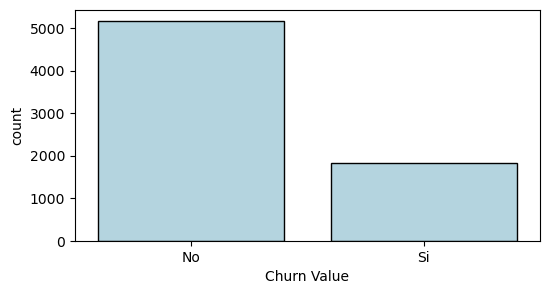

In [7]:
plt.figure(figsize=(6,3)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "Churn Value",  color = "lightblue",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Si"]) 
plt.show();

In [8]:
from imblearn.combine import SMOTETomek

In [9]:
smt = SMOTETomek(random_state=42)

In [10]:
X_bal, y_bal = smt.fit_resample(X, y)

In [11]:
X_bal.head()

,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,...,Multiple Lines_No,Multiple Lines_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Music_No,Streaming Music_Yes,Streaming Movies_No,Streaming Movies_Yes,Contract_mapeada,Offer_mapeada
0,78,1,0,0,0,2,8,1,1,0,...,1,0,1,0,1,0,0,1,0,5
1,74,0,1,1,1,3,17,1,0,1,...,0,1,1,0,1,0,1,0,0,4
2,71,1,3,0,1,3,52,1,1,1,...,0,1,0,1,0,1,0,1,0,3
3,78,0,1,1,1,3,12,1,0,0,...,1,0,0,1,1,0,0,1,0,2
4,80,0,1,1,1,3,14,1,1,1,...,0,1,1,0,1,0,1,0,0,2


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size = 0.2, random_state = 666)


# # Regresión Logística


In [22]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [23]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [16]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

In [19]:
# vamos a hacernos una función
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

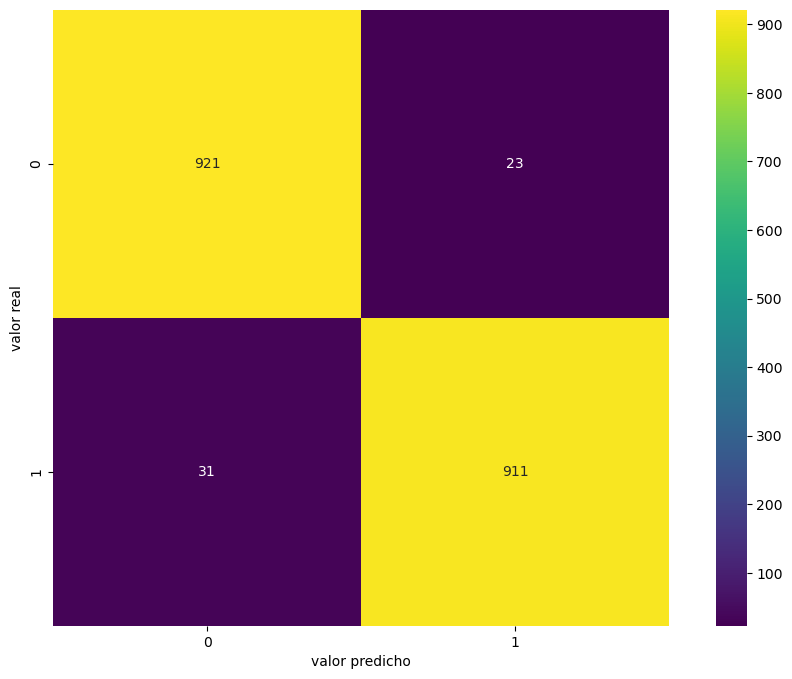

In [24]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [25]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.971368,0.975375,0.967091,0.971215,0.942735,test,Regresión logistica
1,0.973217,0.978040,0.968187,0.973088,0.946433,train,Regresión logistica


# Decision Tree Classifier


In [26]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

5.385164807134504

In [28]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [29]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.967126,0.974138,0.95966,0.966845,0.934251,test,Decission Tree I
1,1.000000,1.000000,1.00000,1.000000,1.000000,train,Decission Tree I


In [30]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

19


In [31]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,3,4,6,8,10,11,12,13,14,15,16,17,18,19],
         "min_samples_split": [25,50, 100, 125, 150, 200, 250],
         "max_features": [1,2,3,4,5], 
         "min_samples_leaf": [25, 50, 100, 125, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [32]:
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 3675 candidates, totalling 36750 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [25, 50, 100, 125, 150, 200, 250],
                         'min_samples_split': [25, 50, 100, 125, 150, 200,
                                               250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [33]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
arbol2.best_params_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 125}

In [40]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
arbol3 = DecisionTreeClassifier( max_depth =  10, max_features=5, min_samples_split=125)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_split=125)

In [41]:
# hacemos las predicciones para el train y el test
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

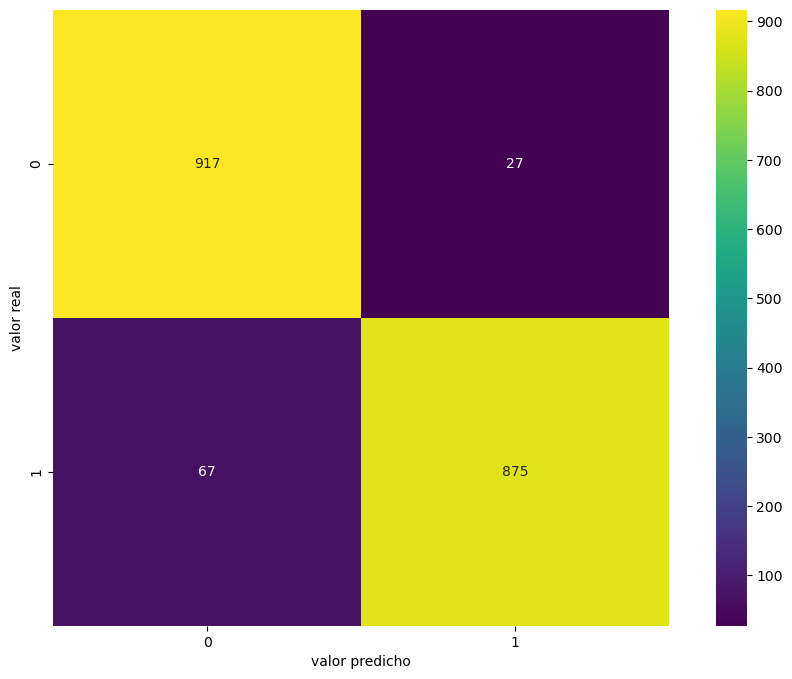

In [42]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [43]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.950159,0.970067,0.928875,0.949024,0.900314,test,Decission Tree II
1,0.952930,0.972353,0.932397,0.951956,0.905862,train,Decission Tree II


In [44]:
# juntamos los resultados con los del modelo anterior
df_all_results = pd.concat([results_logistic, results_decission_tree2], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.971368,0.975375,0.967091,0.971215,0.942735,test,Regresión logistica
1,0.973217,0.978040,0.968187,0.973088,0.946433,train,Regresión logistica
0,0.950159,0.970067,0.928875,0.949024,0.900314,test,Decission Tree II
1,0.952930,0.972353,0.932397,0.951956,0.905862,train,Decission Tree II


# Random Forest


In [46]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,3,4,5,6,7,8,9,10],
         "min_samples_split": [25,50,75,100,125, 150, 200, 250],
         "max_features": [1,2,3,4,5], 
         "min_samples_leaf": [25,50,75, 100, 125, 150, 175, 200,225, 250]}


# Búsqueda por grid search con validación cruzada (cross-validarion)
# ==============================================================================
random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [ ]:
%%time
random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")

random_forest.best_params_

In [ ]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
clf=RandomForestClassifier(min_samples_split= 50,
                           max_features=2,
                           max_depth=4)
clf.fit(X_train,y_train)

In [ ]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

In [ ]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

In [ ]:
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results

# KNeighborsClassifier


# Gradient Boosting


In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,3, 4,6,8,10],
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_)

In [ ]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [ ]:
matriz_gradient = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gradient

In [ ]:
results_gradient = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all_results = pd.concat([df_all_results, results_gradient], axis = 0)
df_all_results

In [ ]:
# guardamos el mejor modelo
with open('data/mejor_modelo.pkl', 'wb') as modelo:
        pickle.dump(grid, modelo)

# Red neuronal